# Classification of synthetic time series data - Mean Ratio Analysis
Following on from simulating data using SSA with varying mean ratios, we aim to classify the time series generated with ML algorithms and analyze how mean differences affect classification difficulty.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from tqdm import tqdm
from statsmodels.nonparametric.smoothers_lowess import lowess

# Import all the functions from the 'src' directory
from stats.report import *
from visualisation.plots import *
from stats.autocorrelation import *
from utils.steady_state import save_steady_state
from simulation.simulate_telegraph_model import simulate_two_telegraph_model_systems

%load_ext autoreload
%autoreload 2

## Read in the IY007 mean ratio data

In [2]:
# Read in accuracy data from mean ratio experiment
df_IY007 = pd.read_csv("/home/ianyang/stochastic_simulations/experiments/EXP-25-IY007/data_mu/IY007_varying_mu.csv")
mu_ratios_recorded = df_IY007["Mean Ratio"].unique()
#then compute mean
linear_svm_accuracy = df_IY007.groupby("Mean Ratio")["SVM (linear) Accuracy"].mean()
rbf_svm_accuracy = df_IY007.groupby("Mean Ratio")["SVM (rbf) Accuracy"].mean()
rf_accuracy = df_IY007.groupby("Mean Ratio")["Random Forest Accuracy"].mean()
log_reg_accuracy = df_IY007.groupby("Mean Ratio")["Logistic Regression Accuracy"].mean()
mlp_accuracy = df_IY007.groupby("Mean Ratio")["MLP Accuracy"].mean()
random_accuracy = df_IY007.groupby("Mean Ratio")["Random Classifier Accuracy"].mean()
lstm_accuracy = df_IY007.groupby("Mean Ratio")["Vanilla LSTM Accuracy"].mean()
iy001a_accuracy = df_IY007.groupby("Mean Ratio")["IY001A Accuracy"].mean()
vanilla_transformer_accuracy = df_IY007.groupby("Mean Ratio")["Vanilla Transformer Accuracy"].mean()
full_transformer_accuracy = df_IY007.groupby("Mean Ratio")["Full Transformer Accuracy"].mean()
iy006c_accuracy = df_IY007.groupby("Mean Ratio")["IY006C-Transformer Accuracy"].mean()

## Plot everything

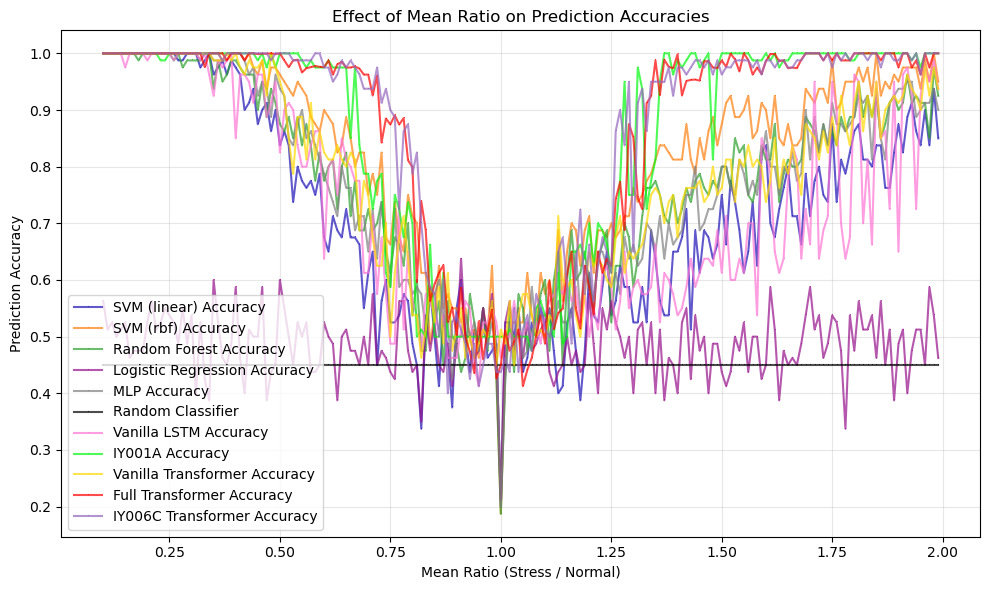

In [3]:
# Define a better color palette for improved visibility
colors = {
    'linear_svm': "#1E13B6",      
    'rbf_svm': '#ff7f0e',          # Orange
    'random_forest': '#2ca02c',    # Green
    'logistic_reg': "#96118ba3",    # Pink
    'mlp': 'gray',              #   Gray
    'random': 'Black',           # Black
    'lstm': "#ff74d5",             # Pink
    'iy001a': "#02f80f",           # Yellow-green
    'iy002a': '#17becf',           # Cyan
    'vanilla_transformer': "#ffd901", # Yellow
    'full_transformer': "#ff0000",  # Red
    'iy006c': '#9467bd'            # Purple
}

# Plot the raw data with improved colors
plt.figure(figsize=(10, 6))
# Plot Mean Ratio vs Classifier Accuracies
plt.plot(mu_ratios_recorded, linear_svm_accuracy, marker=',', linestyle='-', color=colors['linear_svm'], label="SVM (linear) Accuracy", alpha=0.7)
plt.plot(mu_ratios_recorded, rbf_svm_accuracy, marker=',', linestyle='-', color=colors['rbf_svm'], label="SVM (rbf) Accuracy", alpha=0.7)
plt.plot(mu_ratios_recorded, rf_accuracy, marker=',', linestyle='-', color=colors['random_forest'], label="Random Forest Accuracy", alpha=0.7)
plt.plot(mu_ratios_recorded, log_reg_accuracy, marker=',', linestyle='-', color=colors['logistic_reg'], label="Logistic Regression Accuracy", alpha=0.7)
plt.plot(mu_ratios_recorded, mlp_accuracy, marker=',', linestyle='-', color=colors['mlp'], label="MLP Accuracy", alpha=0.7)
plt.plot(mu_ratios_recorded, random_accuracy, marker=',', linestyle='-', color=colors['random'], label="Random Classifier", alpha=0.7)
plt.plot(mu_ratios_recorded, lstm_accuracy, marker=',', linestyle='-', color=colors['lstm'], label="Vanilla LSTM Accuracy", alpha=0.7)
plt.plot(mu_ratios_recorded, iy001a_accuracy, marker=',', linestyle='-', color=colors['iy001a'], label="IY001A Accuracy", alpha=0.7)
plt.plot(mu_ratios_recorded, vanilla_transformer_accuracy, marker=',', linestyle='-', color=colors['vanilla_transformer'], label="Vanilla Transformer Accuracy", alpha=0.7)
plt.plot(mu_ratios_recorded, full_transformer_accuracy, marker=',', linestyle='-', color=colors['full_transformer'], label="Full Transformer Accuracy", alpha=0.7)
plt.plot(mu_ratios_recorded, iy006c_accuracy, marker=',', linestyle='-', color=colors['iy006c'], label="IY006C Transformer Accuracy", alpha=0.7)

plt.xlabel("Mean Ratio (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of Mean Ratio on Prediction Accuracies")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/mu_ratio_vs_accuracy_better_colors.png", bbox_inches='tight')
plt.show()


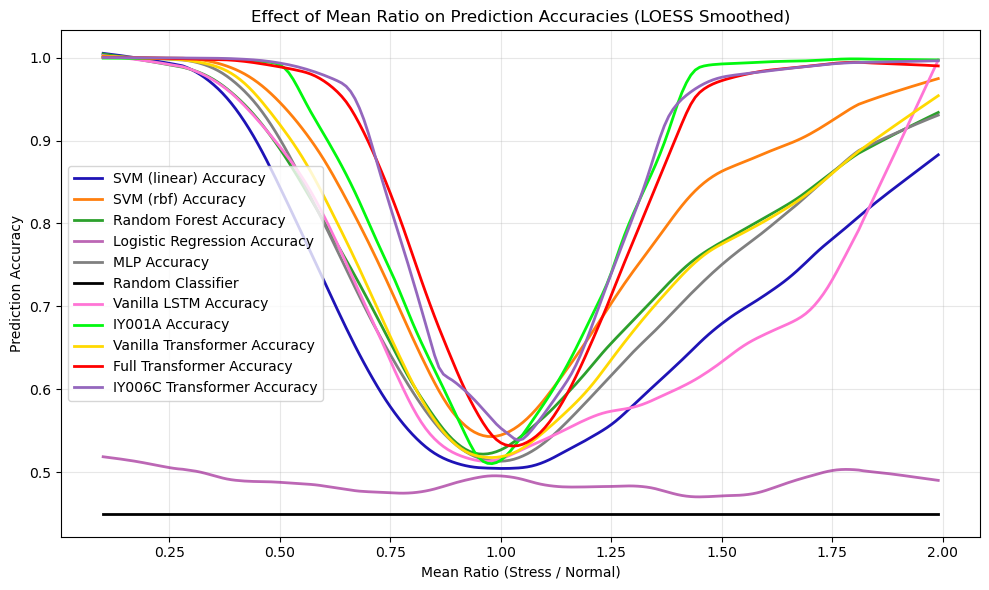

In [6]:

# Apply LOESS smoothing to the data
linear_svm_loess = lowess(linear_svm_accuracy, mu_ratios_recorded, frac=0.2)
rbf_svm_loess = lowess(rbf_svm_accuracy, mu_ratios_recorded, frac=0.2)
rf_loess = lowess(rf_accuracy, mu_ratios_recorded, frac=0.2)
log_reg_loess = lowess(log_reg_accuracy, mu_ratios_recorded, frac=0.2)
mlp_loess = lowess(mlp_accuracy, mu_ratios_recorded, frac=0.2)
random_loess = lowess(random_accuracy, mu_ratios_recorded, frac=0.2)
lstm_loess = lowess(lstm_accuracy, mu_ratios_recorded, frac=0.2)
iy001a_loess = lowess(iy001a_accuracy, mu_ratios_recorded, frac=0.2)
vanilla_transformer_loess = lowess(vanilla_transformer_accuracy, mu_ratios_recorded, frac=0.2)
full_transformer_loess = lowess(full_transformer_accuracy, mu_ratios_recorded, frac=0.2)
iy006c_loess = lowess(iy006c_accuracy, mu_ratios_recorded, frac=0.2)
# Plot the LOESS smoothed data with improved colors
plt.figure(figsize=(10, 6))
plt.plot(linear_svm_loess[:, 0], linear_svm_loess[:, 1], linestyle='-', color=colors['linear_svm'], linewidth=2, label="SVM (linear) Accuracy")
plt.plot(rbf_svm_loess[:, 0], rbf_svm_loess[:, 1], linestyle='-', color=colors['rbf_svm'], linewidth=2, label="SVM (rbf) Accuracy")
plt.plot(rf_loess[:, 0], rf_loess[:, 1], linestyle='-', color=colors['random_forest'], linewidth=2, label="Random Forest Accuracy")
plt.plot(log_reg_loess[:, 0], log_reg_loess[:, 1], linestyle='-', color=colors['logistic_reg'], linewidth=2, label="Logistic Regression Accuracy")
plt.plot(mlp_loess[:, 0], mlp_loess[:, 1], linestyle='-', color=colors['mlp'], linewidth=2, label="MLP Accuracy")
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")
plt.plot(lstm_loess[:, 0], lstm_loess[:, 1], linestyle='-', color=colors['lstm'], linewidth=2, label="Vanilla LSTM Accuracy")
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="IY001A Accuracy")
# Uncomment if you have iy002a_loess
# plt.plot(iy002a_loess[:, 0], iy002a_loess[:, 1], linestyle='-', color=colors['iy002a'], linewidth=2, label="IY002A Accuracy")
plt.plot(vanilla_transformer_loess[:, 0], vanilla_transformer_loess[:, 1], linestyle='-', color=colors['vanilla_transformer'], linewidth=2, label="Vanilla Transformer Accuracy")
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Full Transformer Accuracy")
plt.plot(iy006c_loess[:, 0], iy006c_loess[:, 1], linestyle='-', color=colors['iy006c'], linewidth=2, label="IY006C Transformer Accuracy")

plt.xlabel("Mean Ratio (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of Mean Ratio on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/mu_ratio_vs_accuracy_loess_better_colors.png", bbox_inches='tight')
plt.show()


Select a Handful for visualisation

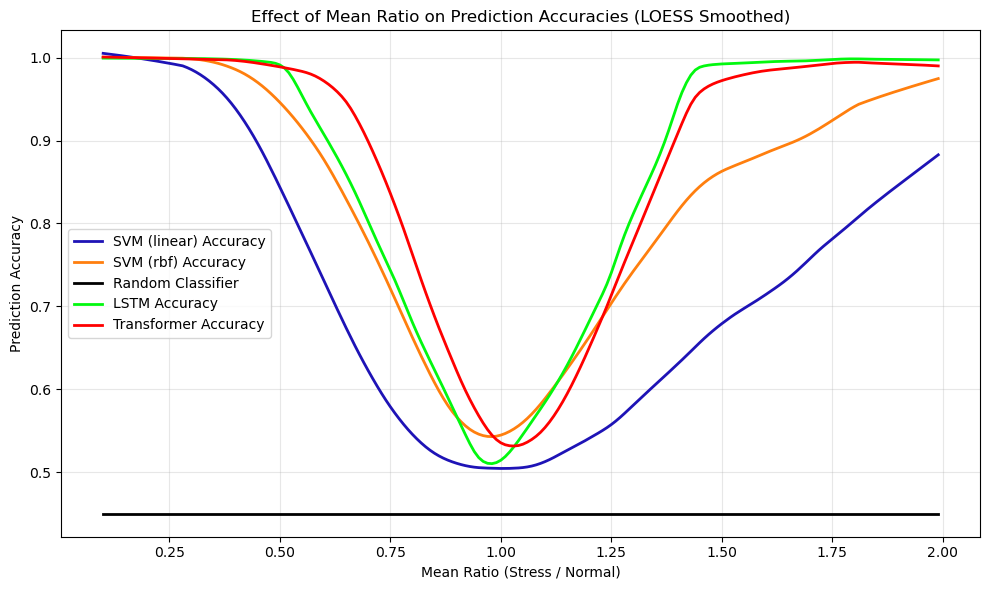

In [7]:
# Plot the LOESS smoothed data with improved colors
plt.figure(figsize=(10, 6))
plt.plot(linear_svm_loess[:, 0], linear_svm_loess[:, 1], linestyle='-', color=colors['linear_svm'], linewidth=2, label="SVM (linear) Accuracy")
plt.plot(rbf_svm_loess[:, 0], rbf_svm_loess[:, 1], linestyle='-', color=colors['rbf_svm'], linewidth=2, label="SVM (rbf) Accuracy")
# plt.plot(rf_loess[:, 0], rf_loess[:, 1], linestyle='-', color=colors['random_forest'], linewidth=2, label="Random Forest Accuracy")
# plt.plot(log_reg_loess[:, 0], log_reg_loess[:, 1], linestyle='-', color=colors['logistic_reg'], linewidth=2, label="Logistic Regression Accuracy")
# plt.plot(mlp_loess[:, 0], mlp_loess[:, 1], linestyle='-', color=colors['mlp'], linewidth=2, label="MLP Accuracy")
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")
# plt.plot(lstm_loess[:, 0], lstm_loess[:, 1], linestyle='-', color=colors['lstm'], linewidth=2, label="Vanilla LSTM Accuracy")
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="LSTM Accuracy")
# Uncomment if you have iy002a_loess
# plt.plot(iy002a_loess[:, 0], iy002a_loess[:, 1], linestyle='-', color=colors['iy002a'], linewidth=2, label="IY002A Accuracy")
# plt.plot(vanilla_transformer_loess[:, 0], vanilla_transformer_loess[:, 1], linestyle='-', color=colors['vanilla_transformer'], linewidth=2, label="Vanilla Transformer Accuracy")
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Transformer Accuracy")
# plt.plot(iy006c_loess[:, 0], iy006c_loess[:, 1], linestyle='-', color=colors['iy006c'], linewidth=2, label="IY006C Transformer Accuracy")

plt.xlabel("Mean Ratio (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of Mean Ratio on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/mu_ratio_vs_accuracy_loess_better_colors_selected.png", bbox_inches='tight')
plt.show()


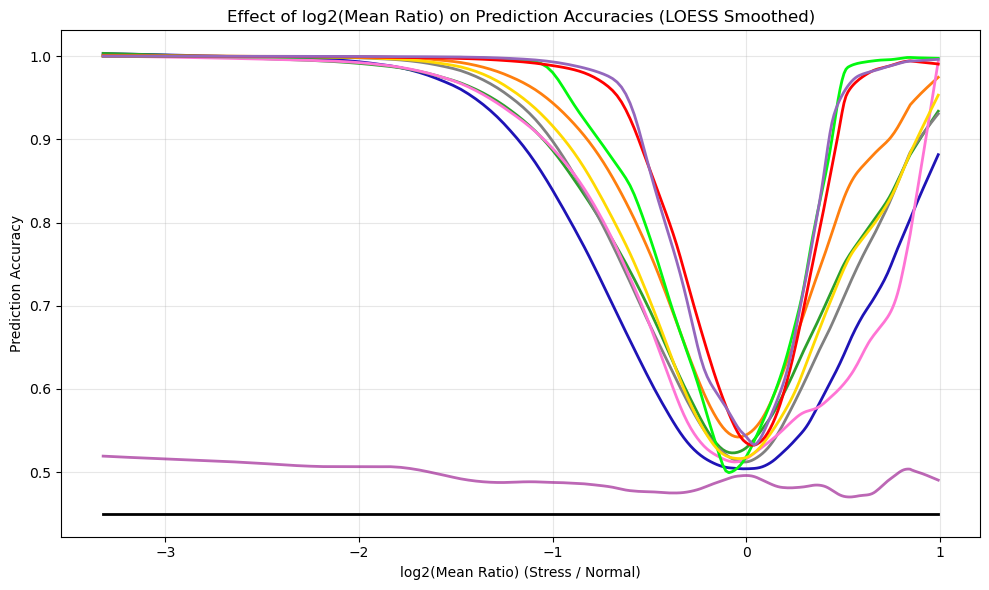

In [8]:

# Compute log2 of mean ratios
log2_mu_ratios = np.log2(mu_ratios_recorded)
# re-compute the loess smoothed data with log2 mean ratios
linear_svm_loess = lowess(linear_svm_accuracy, log2_mu_ratios, frac=0.2)
rbf_svm_loess = lowess(rbf_svm_accuracy, log2_mu_ratios, frac=0.2)
rf_loess = lowess(rf_accuracy, log2_mu_ratios, frac=0.2)
log_reg_loess = lowess(log_reg_accuracy, log2_mu_ratios, frac=0.2)
mlp_loess = lowess(mlp_accuracy, log2_mu_ratios, frac=0.2)
random_loess = lowess(random_accuracy, log2_mu_ratios, frac=0.2)
lstm_loess = lowess(lstm_accuracy, log2_mu_ratios, frac=0.2)
iy001a_loess = lowess(iy001a_accuracy, log2_mu_ratios, frac=0.2)
vanilla_transformer_loess = lowess(vanilla_transformer_accuracy, log2_mu_ratios, frac=0.2)
full_transformer_loess = lowess(full_transformer_accuracy, log2_mu_ratios, frac=0.2)
iy006c_loess = lowess(iy006c_accuracy, log2_mu_ratios, frac=0.2)

# plot the x-asis as log2(t_ac ratio) - lowess smoothed
plt.figure(figsize=(10, 6))
plt.plot(linear_svm_loess[:, 0], linear_svm_loess[:, 1], linestyle='-', color=colors['linear_svm'], linewidth=2, label="SVM (linear) Accuracy")
plt.plot(rbf_svm_loess[:, 0], rbf_svm_loess[:, 1], linestyle='-', color=colors['rbf_svm'], linewidth=2, label="SVM (rbf) Accuracy")
plt.plot(rf_loess[:, 0], rf_loess[:, 1], linestyle='-', color=colors['random_forest'], linewidth=2, label="Random Forest Accuracy")
plt.plot(log_reg_loess[:, 0], log_reg_loess[:, 1], linestyle='-', color=colors['logistic_reg'], linewidth=2, label="Logistic Regression Accuracy")
plt.plot(mlp_loess[:, 0], mlp_loess[:, 1], linestyle='-', color=colors['mlp'], linewidth=2, label="MLP Accuracy")
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")
plt.plot(lstm_loess[:, 0], lstm_loess[:, 1], linestyle='-', color=colors['lstm'], linewidth=2, label="Vanilla LSTM Accuracy")
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="IY001A Accuracy")
plt.plot(vanilla_transformer_loess[:, 0], vanilla_transformer_loess[:, 1], linestyle='-', color=colors['vanilla_transformer'], linewidth=2, label="Vanilla Transformer Accuracy")
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Full Transformer Accuracy")
plt.plot(iy006c_loess[:, 0], iy006c_loess[:, 1], linestyle='-', color=colors['iy006c'], linewidth=2, label="IY006C Transformer Accuracy")
plt.xlabel("log2(Mean Ratio) (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of log2(Mean Ratio) on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/mu_ratio_vs_accuracy_loess_log2_better_colors.png", bbox_inches='tight')
plt.show()

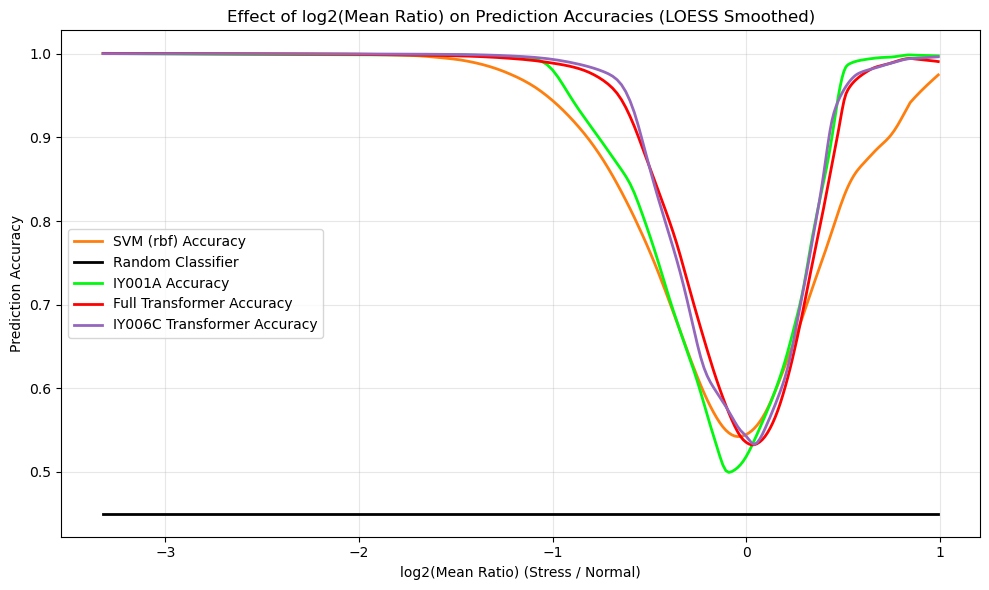

In [9]:
# Plot random classifier, SVM (rbf), and transformer accuracies for key comparison
# plot the x-axis as log2(t_ac ratio) - lowess smoothed
plt.figure(figsize=(10, 6))
plt.plot(rbf_svm_loess[:, 0], rbf_svm_loess[:, 1], linestyle='-', color=colors['rbf_svm'], linewidth=2, label="SVM (rbf) Accuracy")
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="IY001A Accuracy")
# plt.plot(vanilla_transformer_loess[:, 0], vanilla_transformer_loess[:, 1], linestyle='-', color=colors['vanilla_transformer'], linewidth=2, label="Vanilla Transformer Accuracy")
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Full Transformer Accuracy")
plt.plot(iy006c_loess[:, 0], iy006c_loess[:, 1], linestyle='-', color=colors['iy006c'], linewidth=2, label="IY006C Transformer Accuracy")
plt.xlabel("log2(Mean Ratio) (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of log2(Mean Ratio) on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/mu_ratio_vs_accuracy_loess_log2_selected.png", bbox_inches='tight')
plt.show()

In [10]:
# Additional analysis: Show mean ratio values used
print("Summary of the mean ratio experiment:")
print(f"Normal condition mean (fixed): {df_IY007['Normal Mean'].iloc[0]}")
print(f"Stress condition mean range: {df_IY007['Stress Mean'].min():.2f} - {df_IY007['Stress Mean'].max():.2f}")
print(f"Mean ratio range: {df_IY007['Mean Ratio'].min():.2f} - {df_IY007['Mean Ratio'].max():.2f}")
print(f"Number of different ratios tested: {len(mu_ratios_recorded)}")

# Show where classification becomes most difficult (closest to random)
random_baseline = 0.5
classifier_performance = rbf_svm_accuracy.copy()
min_performance_ratio = classifier_performance.idxmin()
min_performance_value = classifier_performance.min()

print(f"\nClassification difficulty analysis:")
print(f"Most difficult ratio (lowest SVM RBF accuracy): {min_performance_ratio:.2f}")
print(f"Accuracy at most difficult ratio: {min_performance_value:.3f}")
print(f"Distance from random baseline: {abs(min_performance_value - random_baseline):.3f}")

Summary of the mean ratio experiment:
Normal condition mean (fixed): 100
Stress condition mean range: 10.00 - 199.00
Mean ratio range: 0.10 - 1.99
Number of different ratios tested: 190

Classification difficulty analysis:
Most difficult ratio (lowest SVM RBF accuracy): 1.00
Accuracy at most difficult ratio: 0.188
Distance from random baseline: 0.312
